RuntimeError: Requested MovieWriter (ffmpeg) not available

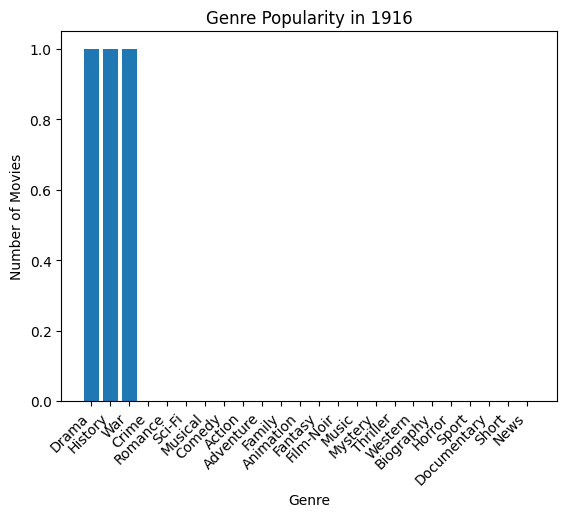

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

df = pd.read_csv('movie_metadata.csv')

s = df['genres'].str.split('|', expand=True).stack()
i = s.index.get_level_values(0)

df_genres = df.loc[i].copy()
df_genres['genre'] = s.values

# Aggregate genre counts by year
genre_counts_by_year = df_genres.groupby(['title_year', 'genre']).size().unstack(fill_value=0)

# Fill missing years if necessary for continuity in animation
genre_counts_by_year.index = genre_counts_by_year.index.astype(int)
genre_counts_by_year = genre_counts_by_year.reindex(range(genre_counts_by_year.index.min(), genre_counts_by_year.index.max() + 1), fill_value=0)
genre_counts_by_year = genre_counts_by_year.fillna(0)  # In case of any NaN values

# Prepare de the plot

fig, ax = plt.subplots()
ax.set_xlim(genre_counts_by_year.index.min(), genre_counts_by_year.index.max())
ax.set_ylim(0, genre_counts_by_year.max().max())

def update(year):
    ax.clear()
    genres = genre_counts_by_year.columns
    counts = genre_counts_by_year.loc[year]
    ax.bar(genres, counts)
    ax.set_title(f'Genre Popularity in {year}')
    ax.set_ylabel('Number of Movies')
    ax.set_xlabel('Genre')
    plt.xticks(rotation=45, ha="right")
    
ani = FuncAnimation(fig, update, frames=range(genre_counts_by_year.index.min(), genre_counts_by_year.index.max() + 1), repeat=False)

from IPython.display import HTML
HTML(ani.to_html5_video())
# To save the animation
#ani.save('genre_popularity_over_time.mp4')